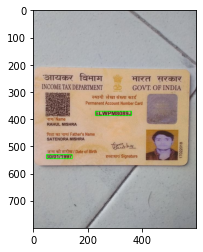

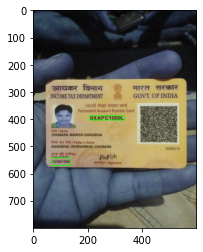

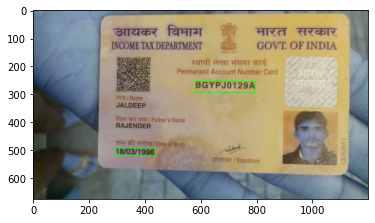

In [29]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pytesseract
import re
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Tesseract-OCR\tesseract.exe'
strings = ['mlimage','ml2image','ml4image']
for string in strings:
    img = cv2.imread('Downloads/'+string+'.jpeg')
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, baw) = cv2.threshold(grayImage, 110, 255, cv2.THRESH_BINARY)
    d = pytesseract.image_to_data(baw,output_type = Output.DICT)
    res = 0
    res1 = 0
    for idx in range(len(d['text'])):
        if any(chr.isalpha() for chr in d['text'][idx]) and any(chr.isdigit() for chr in d['text'][idx]):
            res = idx
            break
    for idx in range(len(d['text'])):
        if re.search('\d{2}/\d{2}/\d{4}', d['text'][idx]):
            match = re.search('\d{2}/\d{2}/\d{4}', d['text'][idx] )
            res1 = idx
            break
        
        
    (x,y,w,h) = (d['left'][res], d['top'][res], d['width'][res], d['height'][res])
    (x1,y1,w1,h1) = (d['left'][res1], d['top'][res1], d['width'][res1], d['height'][res1])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(img, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)
    plt.imshow(img)
    plt.show()
